# **Installing the necessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import matplotlib.image as mpimg
import random
from sklearn import preprocessing
import tensorflow.keras as keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
import zipfile

# Unzip the dataset
local_zip = '/content/potato_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/potato_data')
zip_ref.close()

# **static variables to aid us in our progress**

In [3]:
SIZE = 256
SEED_TRAINING = 121
SEED_TESTING = 197
SEED_VALIDATION = 164
CHANNELS = 3
n_classes = 3
EPOCHS = 10
BATCH_SIZE = 16
input_shape = (SIZE, SIZE, CHANNELS)

# **Augmentation that we will use on our training dataset**

In [4]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 30,
        shear_range = 0.2,
        zoom_range = 0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        horizontal_flip = True,
        fill_mode = 'nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
        directory = '/content/potato_data/Potato/Train/',  # this is the input directory
        target_size = (256, 256),  # all images will be resized to 64x64
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="rgb")
validation_generator = validation_datagen.flow_from_directory(
        '/content/potato_data/Potato/Valid/',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode='categorical',
        color_mode="rgb")
test_generator = test_datagen.flow_from_directory(
        '/content/potato_data/Potato/Test',
        target_size = (256, 256),
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode = "rgb"
)

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# **Convolutional Neural Network Architecture**

In [7]:
model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Dropout(0.5),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(32, activation ='relu'),
        keras.layers.Dense(n_classes, activation='softmax')
    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0

# **Compile**

In [9]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics  = ['accuracy']
    )

# **Train the network**

In [10]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.n // train_generator.batch_size,    #The 2 slashes division return rounded integer
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.n // validation_generator.batch_size
        )

<ipython-input-10-31a96307dfca>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
56/56 [==============================] - 141s 2s/step - loss: 0.8784 - accuracy: 0.5373 - val_loss: 0.4885 - val_accuracy: 0.8194
Epoch 2/10
56/56 [==============================] - 132s 2s/step - loss: 0.4686 - accuracy: 0.7998 - val_loss: 0.3066 - val_accuracy: 0.8958
Epoch 3/10
56/56 [==============================] - 129s 2s/step - loss: 0.3808 - accuracy: 0.8428 - val_loss: 0.3996 - val_accuracy: 0.8715
Epoch 4/10
56/56 [==============================] - 132s 2s/step - loss: 0.3088 - accuracy: 0.8790 - val_loss: 0.4167 - val_accuracy: 0.8472
Epoch 5/10
56/56 [==============================] - 140s 2s/step - loss: 0.2583 - accuracy: 0.9005 - val_loss: 0.2683 - val_accuracy: 0.8854
Epoch 6/10
56/56 [==============================] - 137s 2s/step - loss: 0.2172 - accuracy: 0.9106 - val_loss: 0.3642 - val_accuracy: 0.8611
Epoch 7/10
56/56 [==============================] - 132s 2s/step - loss: 0.2545 - accuracy: 0.9005 - val_loss: 0.2305 - val_accuracy: 0.9167
Epoch 8/10
56

# **Model performs on the test data**

In [12]:
score = model.evaluate_generator(test_generator)
print("Test loss : ", score[0])
print("Test accuracy : ", score[1])

<ipython-input-12-4e3d4fee77a5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss :  0.24267470836639404
Test accuracy :  0.9366666674613953


# **Let’s have a look at the history parameter**

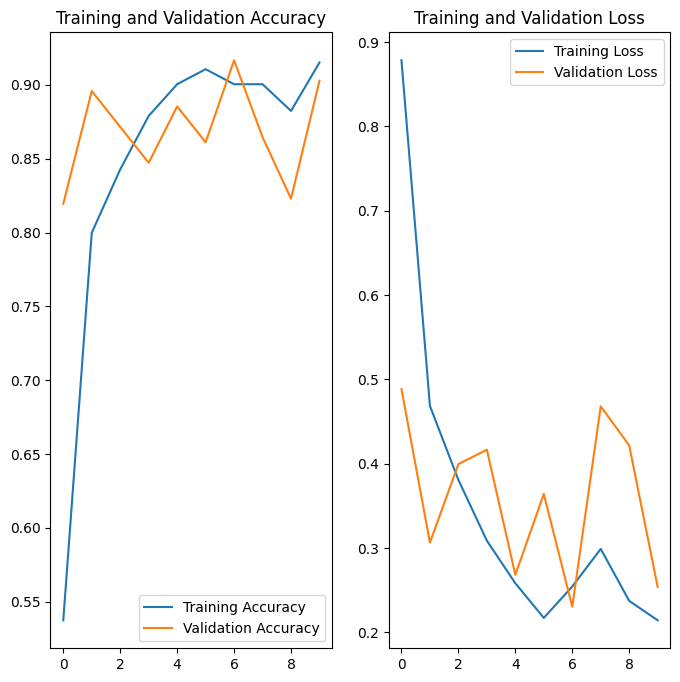

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Let's save our model**

In [14]:
#hdf5 format
model.save('final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
